## "Numerical solution of non-linear equations"


### Explore the function f(x) = 0 to its roots
# $ln(x+1) - x^3 + 1 = 0, x > 0$ 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
def f(x):
    return np.log(x + 1.) - x ** 3 + 1

In [9]:
x = np.arange(-.9, 2, 0.1)
y = f(x)

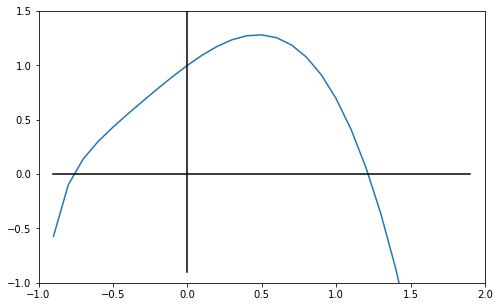

In [10]:
plt.figure(figsize=(8, 5))

plt.plot(x, y)
plt.plot(x, 0*x, 0*x, x, color = 'black')


ax = plt.gca()

plt.xlim([-1,2])
plt.ylim([-1,1.5])

plt.show()
None

# Dichotomy

 We can graphically separate the root on the interval (1; 2).Then we apply the method of half division and display the result in the form of a pandas table

In [11]:
a = 1
b = 2
eps = 0.1

tab = [[a, b, f(a), f(b) , (a + b)/2 , b - a]]
k = 0
while b - a > eps:
    k = (a+b)/2
    if f(k)*f(a) >= 0:
        a = k
    else:
        b = k
    tab.append([a, b, f(a), f(b) , (a + b)/2 , b - a])

In [12]:
pd.DataFrame(tab, columns = ["a", "b", "f(a)", "f(b)", "(a+b)/2", "b-a"])

,a,b,f(a),f(b),(a+b)/2,b-a
0,1.0000,2.00,0.693147,-5.901388,1.50000,1.0000
1,1.0000,1.50,0.693147,-1.458709,1.25000,0.5000
2,1.0000,1.25,0.693147,-0.142195,1.12500,0.2500
3,1.1250,1.25,0.329944,-0.142195,1.18750,0.1250
4,1.1875,1.25,0.108199,-0.142195,1.21875,0.0625


# Fixed-point iteration

 Let's take our function $ln(x+1) - x^3 + 1 = 0$  and transform it into a form convenient for iteration. That is, let's say: $x = \sqrt[3]{ln(x+1) + 1}$. Got the expression $ x = \varphi(x)$. 
 
 As an initial approximation, we take $x_0 = 1.21875$. We can estimate the distance from the rest x from the initial approximation: $|x - x_0| \leq  \delta = 0.03125$ 
 
 Note that the function $\varphi$ is continuous. In addition, the derivative $ \frac{d\varphi}{dx} = \frac{1}{((3 + 3 x) (1 + ln(1 + x))^{2/3})}$ less than one on the segment [1.1875, 1.25]. The derivative is a monotonically decreasing function, so we can estimate from above by taking the argument equal to the left boundary at the last step(in our case x = 1.1875. then $ \frac{d\varphi}{dx}(1.1875) = 0.103642$. I.e $ \frac{d\varphi}{dx} = \frac{1}{((3 + 3 x) (1 + ln(1 + x))^{2/3})} \leq q = 0.11 < 1$. 
 
 Moreover, $|x_0 - \varphi(x_0) | \leq m = 0.025$.
 
 This means that the inequality: $\frac{m}{1-q} \leq \delta$. Then a sufficient condition for the convergence of the fixed-point method is satisfied.
 
 Bearing in mind that q < 0.5, as a stop of the iterative process, we can use $|x_{k+1} - x_{k}| < \varepsilon$

In [13]:
def phi(x):
    return (np.log(x+1) + 1)**(1/3)

In [14]:
eps = 10**-7
k1 = 1.21875
k2 = phi(k1)

tab = [[k1, np.abs(k2-k1)]]
while np.abs(k2 - k1) > eps:
    k1 = k2
    k2 = phi(k1)
    tab.append([k1, np.abs(k2-k1)])

SIM = pd.DataFrame(tab, columns = [("Simple iteration method","x_k"), ("Simple iteration method", "|x_k - x_k-1|")])
SIM.columns = pd.MultiIndex.from_tuples(SIM.columns, names=['Name',''])
SIM

Name Simple iteration method              
                         x_k |x_k - x_k-1|
0                   1.218750  2.998412e-03
1                   1.215752  3.050525e-04
2                   1.215447  3.106716e-05
3                   1.215415  3.164271e-06
4                   1.215412  3.222926e-07
5                   1.215412  3.282673e-08

In [15]:
print(k1, k2)

1.215411981987711 1.2154119491609852


### Thus, we got a root with seven significant digits $ x \approx 1.2154119$

# Newton's method

Let's check the convergence of Newton's method:
$x_0 = 1.21875$, then $h_0 = -\frac{f(x_0)}{f'(x_0)} \approx -0.00333$. 

Let's take a segment $s_0[x_0 +2h_0, x_0]$, I.e $s_0 = [1.21209, 1.21875]$
f''(x) = $-\frac{(1 + 6 x + 12 x^2 + 6 x^3)}{(1 + x)^2}$
It is not difficult to check that $max_sf''(x) \approx -7.4769 = M $

then the inequality: $2|h_0|M \leq |f'(x_0)|$

This implies the uniqueness of the solution, the sequence can be constructed and it converges. 

In [16]:
def df(x):
    return -3*x**2 + 1/(x+1)

In [17]:
def NewtonF(x):
    return x - f(x)/df(x)

In [18]:
eps = 10**-7
k1 = 1.21875
k2 = NewtonF(k1)
tab = [[k1, np.abs(k2-k1)]]

while np.abs(k1-k2) > eps:
    k1 = k2
    k2 = NewtonF(k1)
    
    tab.append([k1, np.abs(k2-k1)])
    
NewtonM = pd.DataFrame(tab, columns = [("Newton's method","x_k"), ("Newton's method", "|x_k - x_k-1|")])
NewtonM.columns = pd.MultiIndex.from_tuples(NewtonM.columns, names=['Name',''])

NewtonM

Name Newton's method              
                 x_k |x_k - x_k-1|
0           1.218750  3.327610e-03
1           1.215422  1.044488e-05
2           1.215412  1.027320e-10

In [19]:
print(k1, k2)

1.2154119455410195 1.2154119454382875


### Thus, by Newton's method, we obtained the root 1.2154119454382875 with an error $10^{-7}$

# Steffensen's method

The Steffensen method itself is equivalent to the fixed-point method, except that it involves the Aitkin transform
## $x_{k+1} = \frac{x_k\varphi(\varphi(x_k)) - \varphi(x_k)^2}{\varphi(\varphi(x_k)) - \varphi(x_k) + x_k}$

In [20]:
def SteffensenF(x):
    return (x*phi(phi(x)) - phi(x)**2)/(phi(phi(x)) - 2*phi(x) + x)

In [21]:
eps = 10**-7

k1 = 1.21875
k2 = SteffensenF(k1)
tab = [[k1, np.abs(k2-k1)]]

while np.abs(k1-k2) > eps:
    k1 = k2
    k2 = SteffensenF(k1)
    
    tab.append([k1, np.abs(k2-k1)])

SteffensenM = pd.DataFrame(tab, columns = [("Steffensen method","x_k"), ("Steffensen method", "|x_k - x_k-1|")])

SteffensenM.columns = pd.MultiIndex.from_tuples(SteffensenM.columns, names=['Name',''])
SteffensenM

Name Steffensen method              
                   x_k |x_k - x_k-1|
0             1.218750  3.338015e-03
1             1.215412  3.782709e-08

In [22]:
print(k1, k2)

1.2154119851698788 1.2154119473427907


In [23]:
pd.concat([SIM, NewtonM, SteffensenM], axis=1).fillna('-')


Name Simple iteration method               Newton's method                \
                         x_k |x_k - x_k-1|             x_k |x_k - x_k-1|   
0                   1.218750  2.998412e-03         1.21875      0.003328   
1                   1.215752  3.050525e-04        1.215422       0.00001   
2                   1.215447  3.106716e-05        1.215412           0.0   
3                   1.215415  3.164271e-06               -             -   
4                   1.215412  3.222926e-07               -             -   
5                   1.215412  3.282673e-08               -             -   

Name Steffensen method                
                   x_k |x_k - x_k-1|  
0              1.21875      0.003338  
1             1.215412           0.0  
2                    -             -  
3                    -             -  
4                    -             -  
5                    -             -